## Fetch data 

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [2]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [3]:
x,y = mnist['data'],mnist['target']
import numpy as np
import pandas as pd

In [4]:
x = x.to_numpy()

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

In [7]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28)

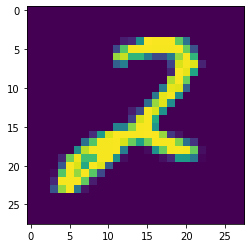

In [8]:
plt.imshow(some_digit_image);


In [9]:
y[36001]

'2'

In [10]:
x_train,x_test = x[:60000],x[60000:]

In [11]:
y_train,y_test = y[:60000],y[60000:]

## train test split by suffling the data

In [12]:
suffled_index = np.random.permutation(60000)
x_train,y_train = x_train[suffled_index],y_train[suffled_index]

## Creating a 2 detector

In [13]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)
y_train_2

51487    False
26991    False
45786    False
27087    False
5568     False
         ...  
4913     False
10821    False
11221    False
26766    False
14259    False
Name: class, Length: 60000, dtype: bool

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
clg = LogisticRegression(solver = 'lbfgs')

In [16]:
clg.fit(x_train,y_train_2)

C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
clg.predict([some_digit])

array([ True])

## Cross validation

In [18]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clg,x_train,y_train_2,cv = 3 )

C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [19]:
a.mean()

0.9784666666666667

## calculate cross_val_predict
Use for check of predicted values

In [20]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clg,x_train,y_train_2,cv = 3);

C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [21]:
y_train_pred

array([False, False, False, ..., False, False, False])

## calculating confusion matrix

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_2,y_train_pred) ## this is confusion matrix 

array([[53571,   471],
       [  821,  5137]], dtype=int64)

In [24]:
confusion_matrix(y_train_2,y_train_2) ## This is perfect prediction matrix as the classifier 
## is not showing any type of wrong prediction in the diagonals
## It is an ideal confusion martrix

array([[54042,     0],
       [    0,  5958]], dtype=int64)

## Precision and Recall

In [25]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_2,y_train_pred)

0.9160128388017118

In [26]:
recall_score(y_train_2,y_train_pred)

0.8622020812353138

## F1-score

In [27]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_2,y_train_pred)

0.8882932733875151

## Precision Recall curve 

In [29]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(clg ,x_train,y_train_2,cv=3,method = 'decision_function')

C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ashutosh sahoo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [30]:
y_scores

array([ -6.08523341,  -2.00788647, -12.77386823, ...,  -9.44817812,
        -0.67072708, -10.44653006])

In [31]:
precisions,recalls,thresholds = precision_recall_curve(y_train_2,y_scores)

In [32]:
precisions

array([0.10054678, 0.1005316 , 0.1005333 , ..., 1.        , 1.        ,
       1.        ])

In [33]:
recalls

array([1.00000000e+00, 9.99832158e-01, 9.99832158e-01, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [34]:
thresholds

array([-26.03288976, -26.0259512 , -26.02243056, ...,  17.47821653,
        19.16032208,  21.13599229])

## plotting precision recall curve

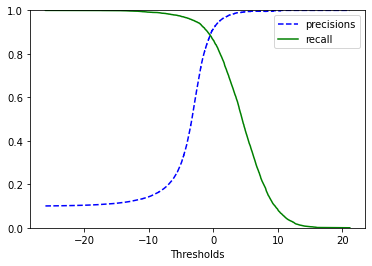

In [35]:
plt.plot(thresholds,precisions[:-1],'b--',label = "precisions")
plt.plot(thresholds,recalls[:-1],'g-',label = "recall")
plt.xlabel("Thresholds")
plt.legend(loc = 'upper right')
plt.ylim([0,1])
plt.show;